In [2]:
import os
#Check all sqaures have 200 images
foldernames = [x[0] for x in os.walk('images')]
foldernames.remove('images')
print('Total locations: ', len(foldernames))
idxs = [int(foldername.split(',')[0].split('/')[1]) for foldername in foldernames]
total_missing = 0
for i in range(88):
    c = idxs.count(i)
    if c!=200:
        print('idx: {} has count {}'.format(i,c))
        total_missing += 200 -c
print('Total missing locations: ', total_missing)

Total locations:  17600
Total missing locations:  0


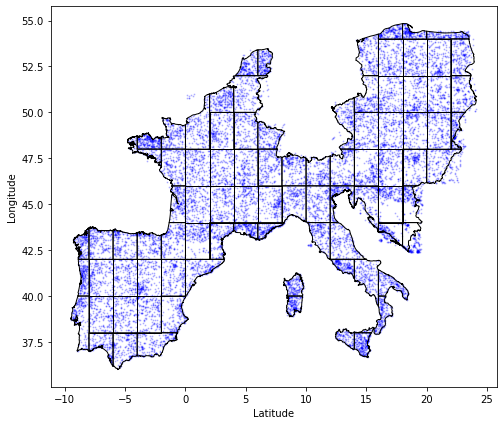

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import walk
import pickle

foldernames = [x[0] for x in os.walk('images')]
foldernames.remove('images')
cords = []

cords = [[float(foldername.split(',')[1]),float(foldername.split(',')[2])] for foldername in foldernames]

cords = np.array(cords)
cords=pd.DataFrame(cords, columns=['long', 'lat'])

map = pickle.load(open("PolyGrid.pkl",'rb'))

fig, ax = plt.subplots(figsize = (8,7))

for i in map.values():
    plt.plot(i[:,1],i[:,0],color='black',linewidth=1)

ax.scatter(cords.lat, cords.long, zorder=1, alpha= 0.2, c='b', s=1)
ax.set_ylabel('Longitude')
ax.set_xlabel('Latitude')
plt.savefig('locations_gathered')
plt.show()

